### Task1: Visualize a Mel-Spectrogram

- Select 3 different instruments and 3 different pitches and visualize one mel-
spectrogram of them

- There should be 9 figures in your report but the format is up to you

- Remember to convert the power to dB

- Please fix the FFT window size=2048, and the hop length=512

In [1]:
# !pip install librosa
# !pip install torchaudio
import librosa
import torchaudio

In [2]:
# read example.json file
import json
import os
import torch
import numpy as np

# load the json file
def load_json(json_file):
    with open(json_file) as f:
        data = json.load(f)
    return data

data = load_json('nsynth-subtrain/examples.json')
print(data["bass_synthetic_022-108-127"])

{'note': 89262, 'sample_rate': 16000, 'pitch': 108, 'instrument_source': 2, 'instrument_family_str': 'bass', 'instrument_str': 'bass_synthetic_022', 'note_str': 'bass_synthetic_022-108-127', 'qualities_str': ['bright', 'distortion'], 'instrument_source_str': 'synthetic', 'velocity': 127, 'instrument_family': 0, 'instrument': 321, 'qualities': [1, 0, 1, 0, 0, 0, 0, 0, 0, 0]}


In [3]:
# get all "instrument_family_str"
instrument_family_str = set()
for key in data:
    instrument_family_str.add(data[key]["instrument_family_str"])

print(instrument_family_str)

{'reed', 'bass', 'organ', 'mallet', 'synth_lead', 'brass', 'guitar', 'string', 'vocal', 'flute', 'keyboard'}


In [4]:
# get all "pitch"
pitch = set()
for key in data:
    pitch.add(data[key]["pitch"])

print(pitch)

{9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120}


In [5]:
import random
pitch = list(pitch)
instrument_family_str = list(instrument_family_str)

# randomly select 3 "pitch" and 3 "instrument_family_str"
selected_pitch = random.sample(pitch, 3)
selected_instrument_family_str = random.sample(instrument_family_str, 3)
print(selected_pitch)
print(selected_instrument_family_str)


[108, 41, 75]
['brass', 'guitar', 'bass']


In [6]:
# match the selected "pitch" and "instrument_family_str" to get 9 tags
selected_data = []
for i in range(3):
    for j in range(3):
        for key in data:
            if data[key]["pitch"] == selected_pitch[i] and data[key]["instrument_family_str"] == selected_instrument_family_str[j]:
                selected_data.append(key)
                break



In [7]:
# print tags and their corresponding "instrument_family_str" and "pitch"
for i in selected_data:
    print(i)

guitar_electronic_023-108-050
bass_synthetic_022-108-127
brass_acoustic_017-041-025
guitar_electronic_038-041-025
bass_synthetic_030-041-127
brass_acoustic_044-075-100
guitar_electronic_020-075-127
bass_synthetic_019-075-127


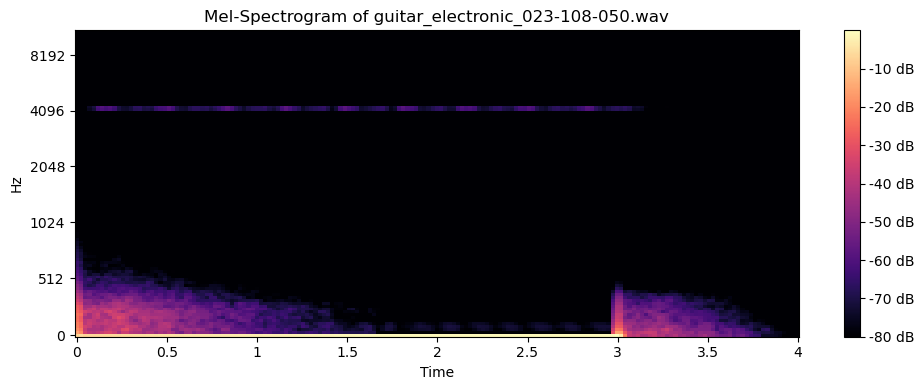

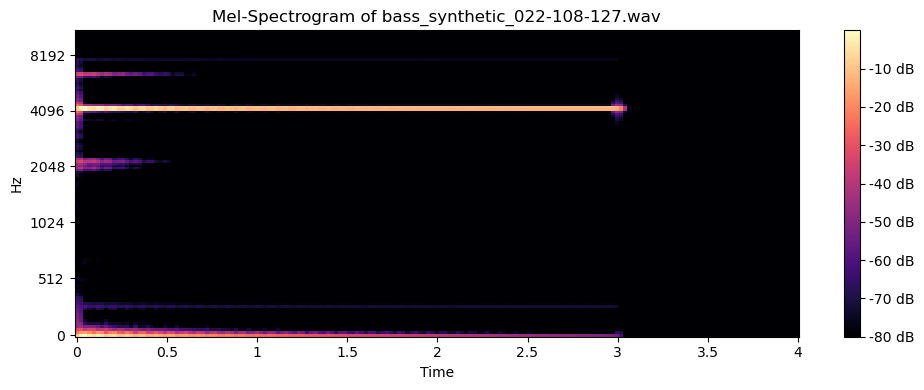

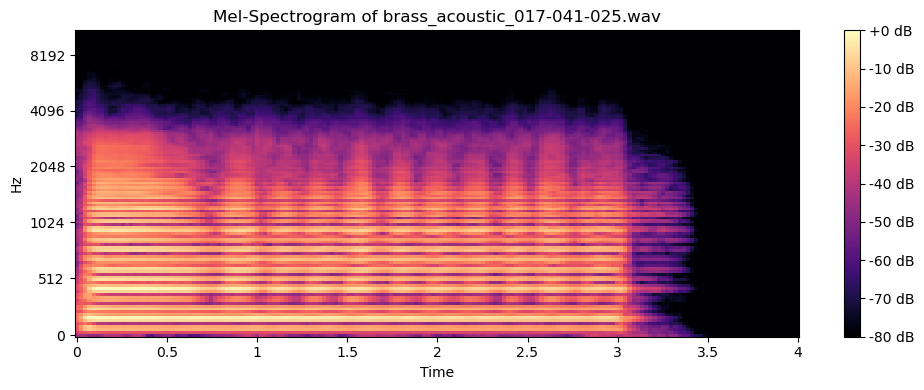

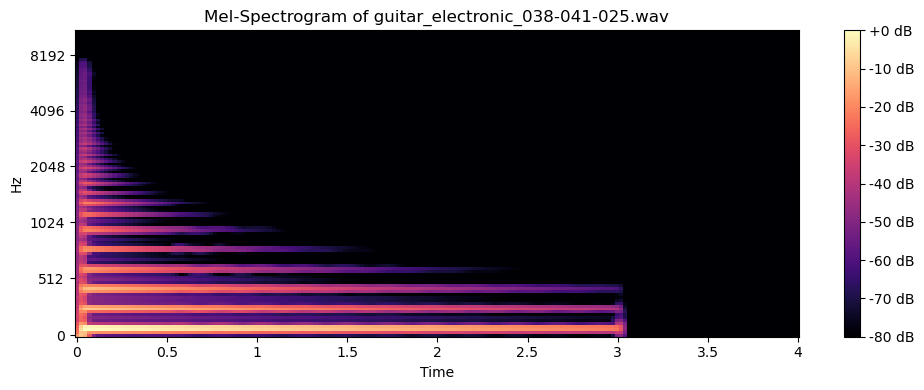

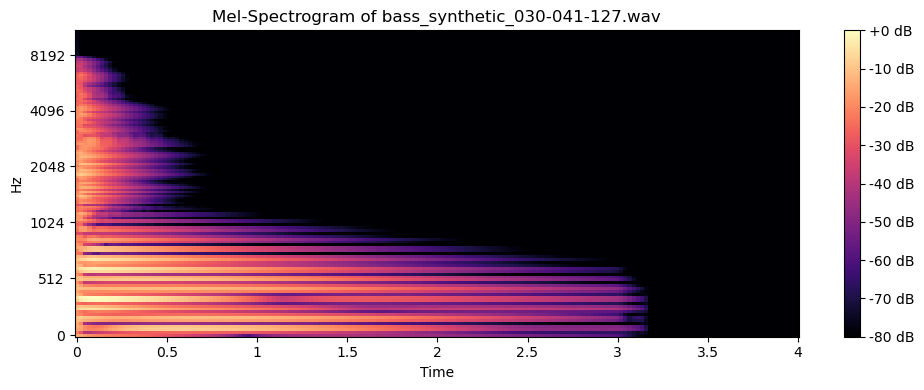

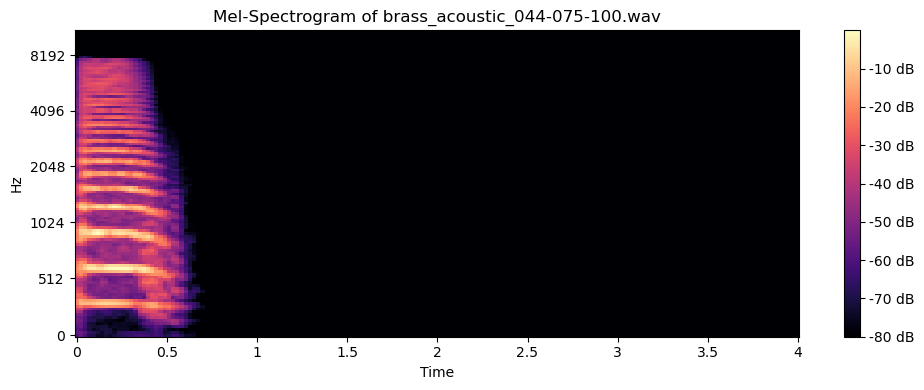

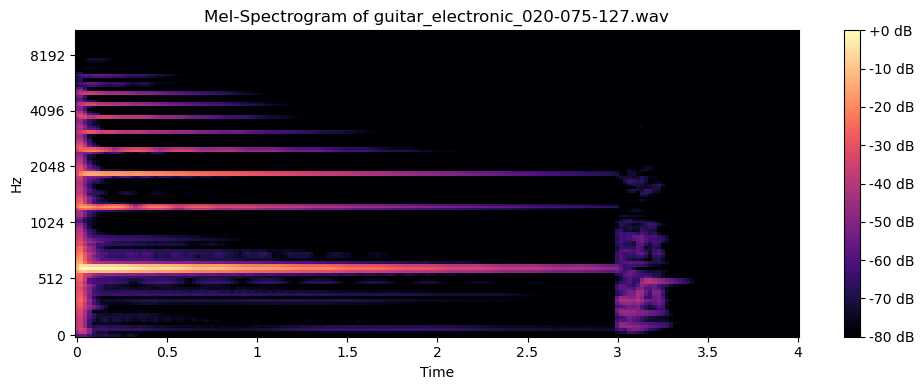

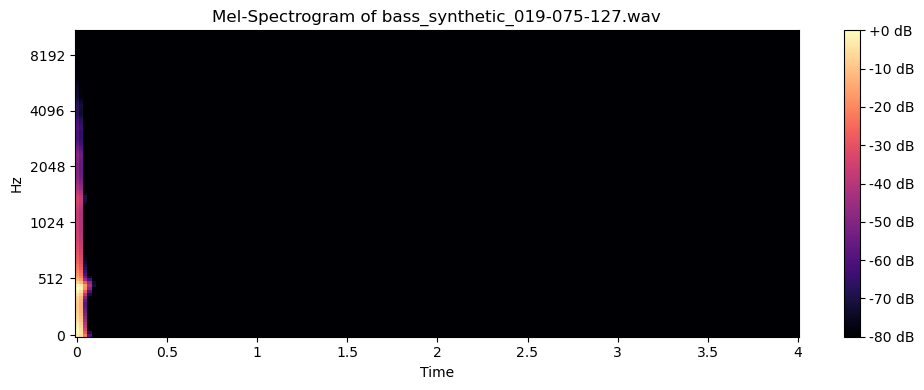

In [15]:
# Visualize a Mel-Spectrogram
# set FFT window size=2048, and the hop length=512
# convert the power to dB
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os

# Set the FFT window size and hop length
n_fft = 2048
hop_length = 512

# Define a function to plot the Mel Spectrogram
def plot_mel_spectrogram(file_name):
    # Read the audio file
    y, sr = librosa.load(file_name)

    # compute the Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)

    # convert the power to dB   
    S_dB = librosa.power_to_db(S, ref=np.max)

    # plot the Mel Spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-Spectrogram of {os.path.basename(file_name)}')
    plt.tight_layout()
    plt.show()

# 處理每一個檔案
for file in selected_data:
    # data is under nsynth-subtrain/audio folder
    # the data is missing .wav extension
    file = 'nsynth-subtrain/audio/' + file + '.wav'
    plot_mel_spectrogram(file)
